In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
%matplotlib inline

In [2]:
from zipfile import ZipFile
import geopandas as gpd
from shapely.geometry import Point

In [3]:
pd.options.display.max_columns = None
display(HTML("<style>.container { width:100% !important; }</style>"))

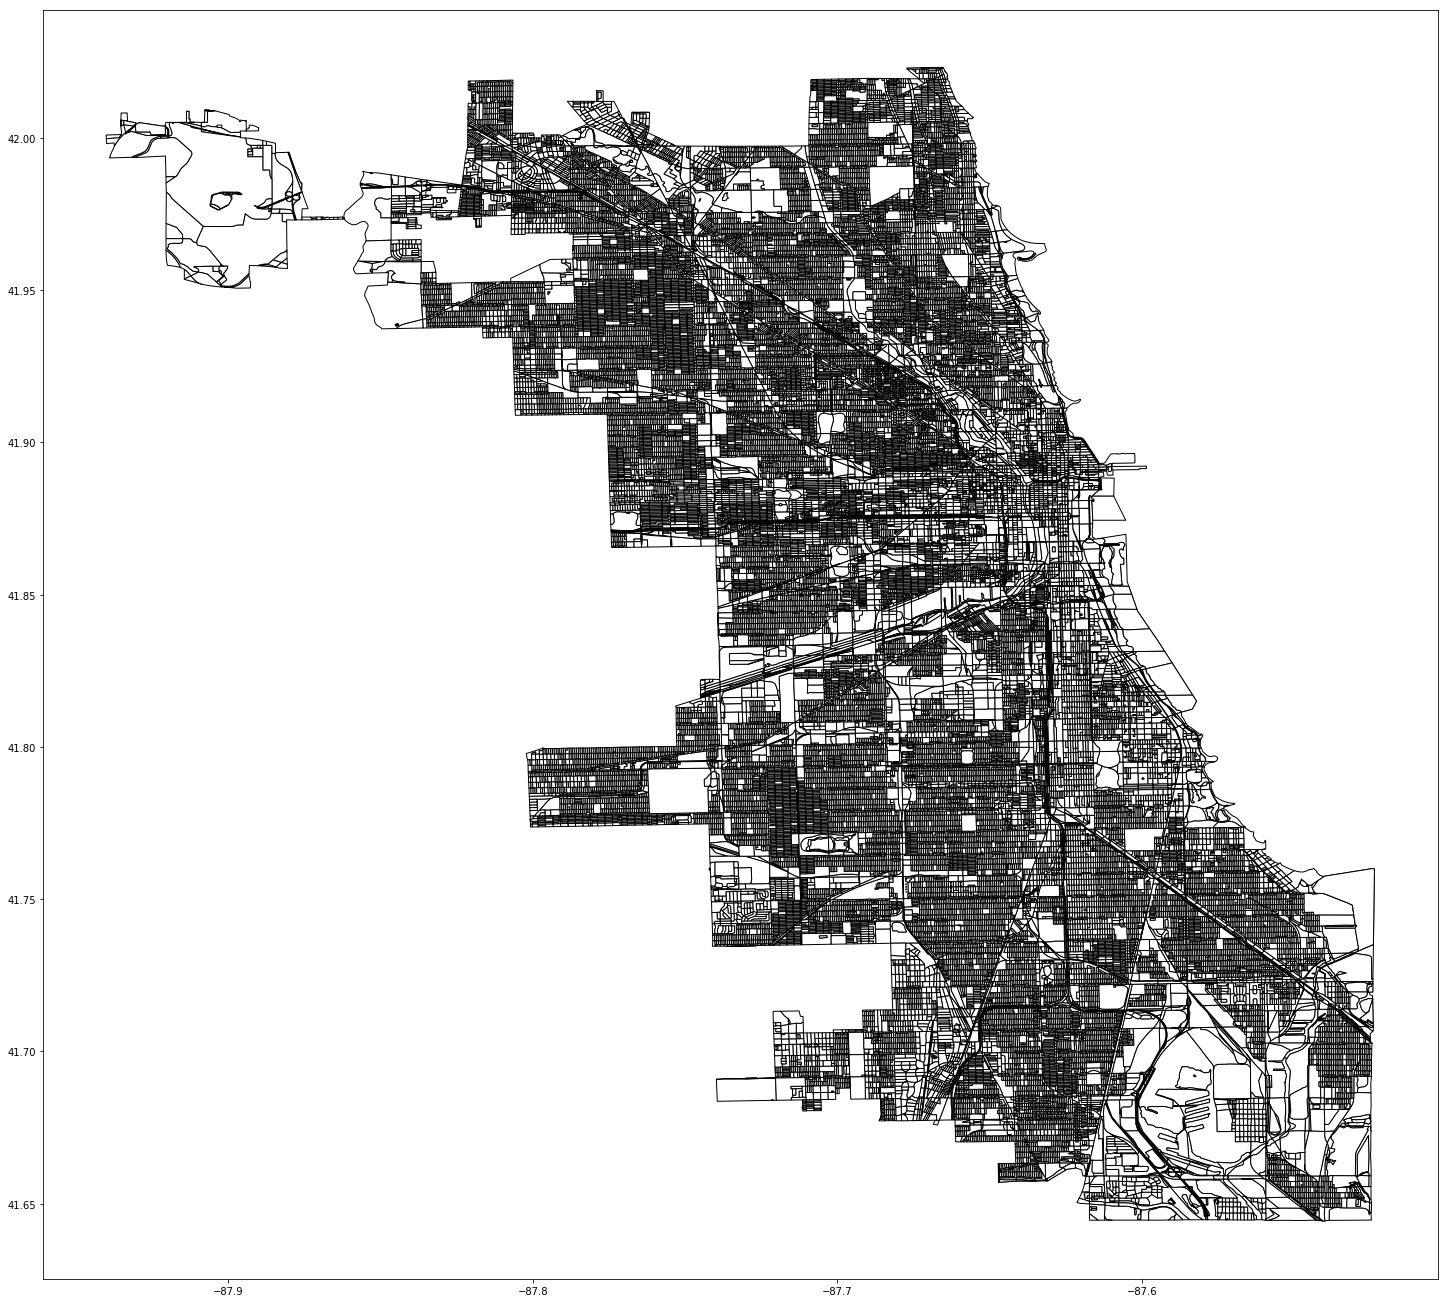

In [37]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'shapefiles', 'Boundaries - Census Blocks - 2010.zip')
coord_system = {'init': 'epsg:4326'}
chicago_census_blocks = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)
chicago_census_blocks['geoid10'] = chicago_census_blocks['geoid10'].astype(str)
chicago_census_blocks.plot(color='white', edgecolor='black', figsize=(25,25))

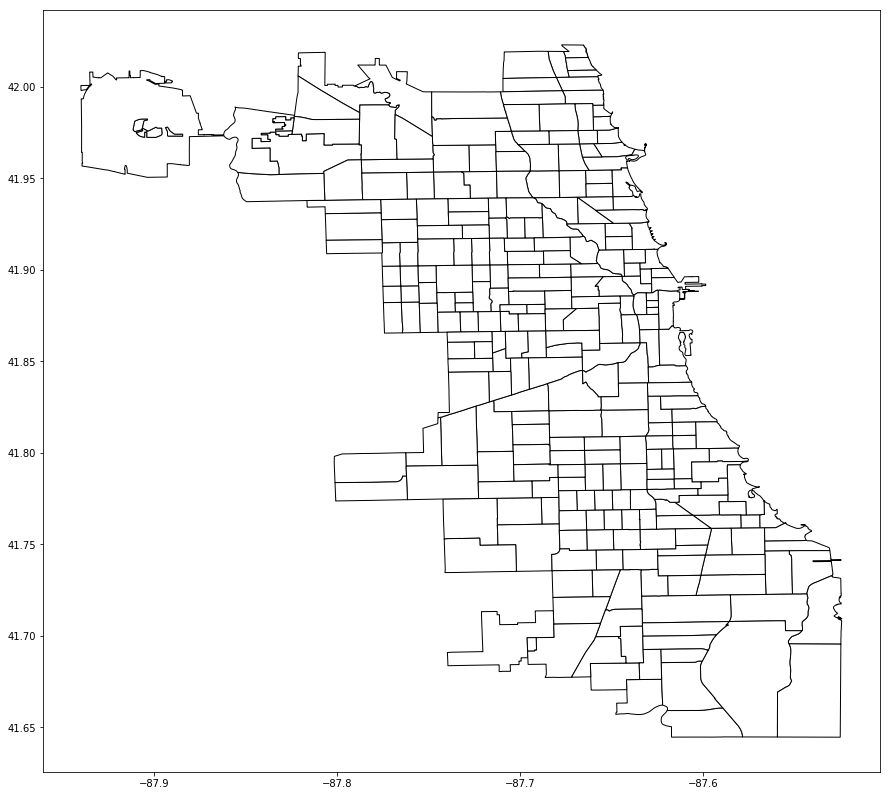

In [13]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'shapefiles', 'Boundaries - Police Beats (current).zip')
coord_system = {'init': 'epsg:4326'}
chicago_police_beats = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)
chicago_police_beats.plot(color='white', edgecolor='black', figsize=(15,15))

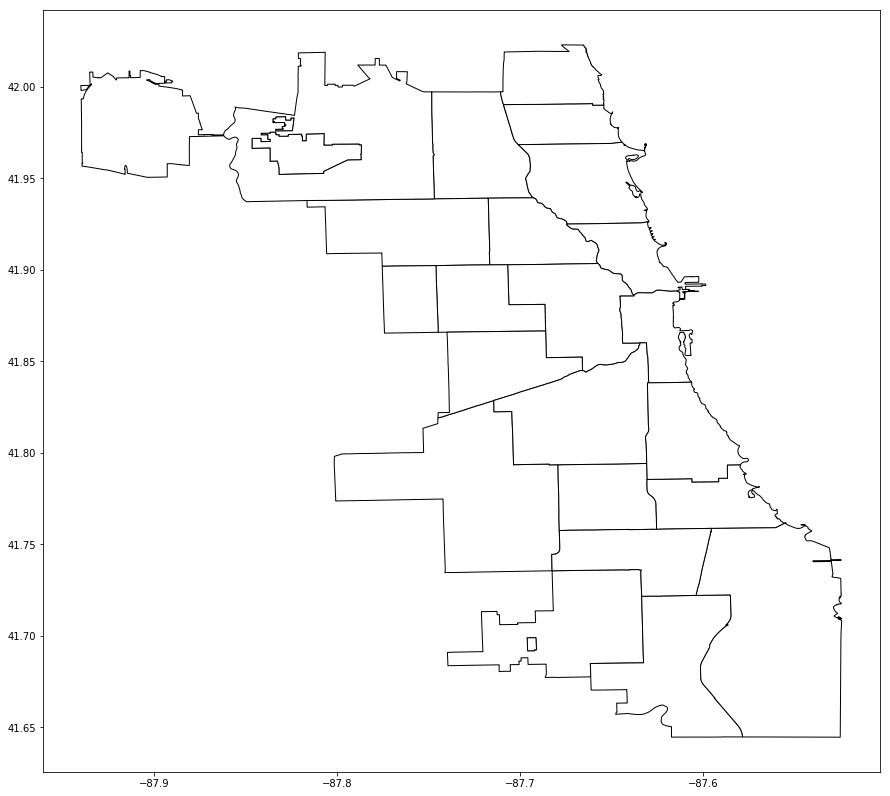

In [14]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'shapefiles', 'Boundaries - Police Districts (current).zip')
coord_system = {'init': 'epsg:4326'}
chicago_police_districts = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)
chicago_police_districts.plot(color='white', edgecolor='black', figsize=(15,15))

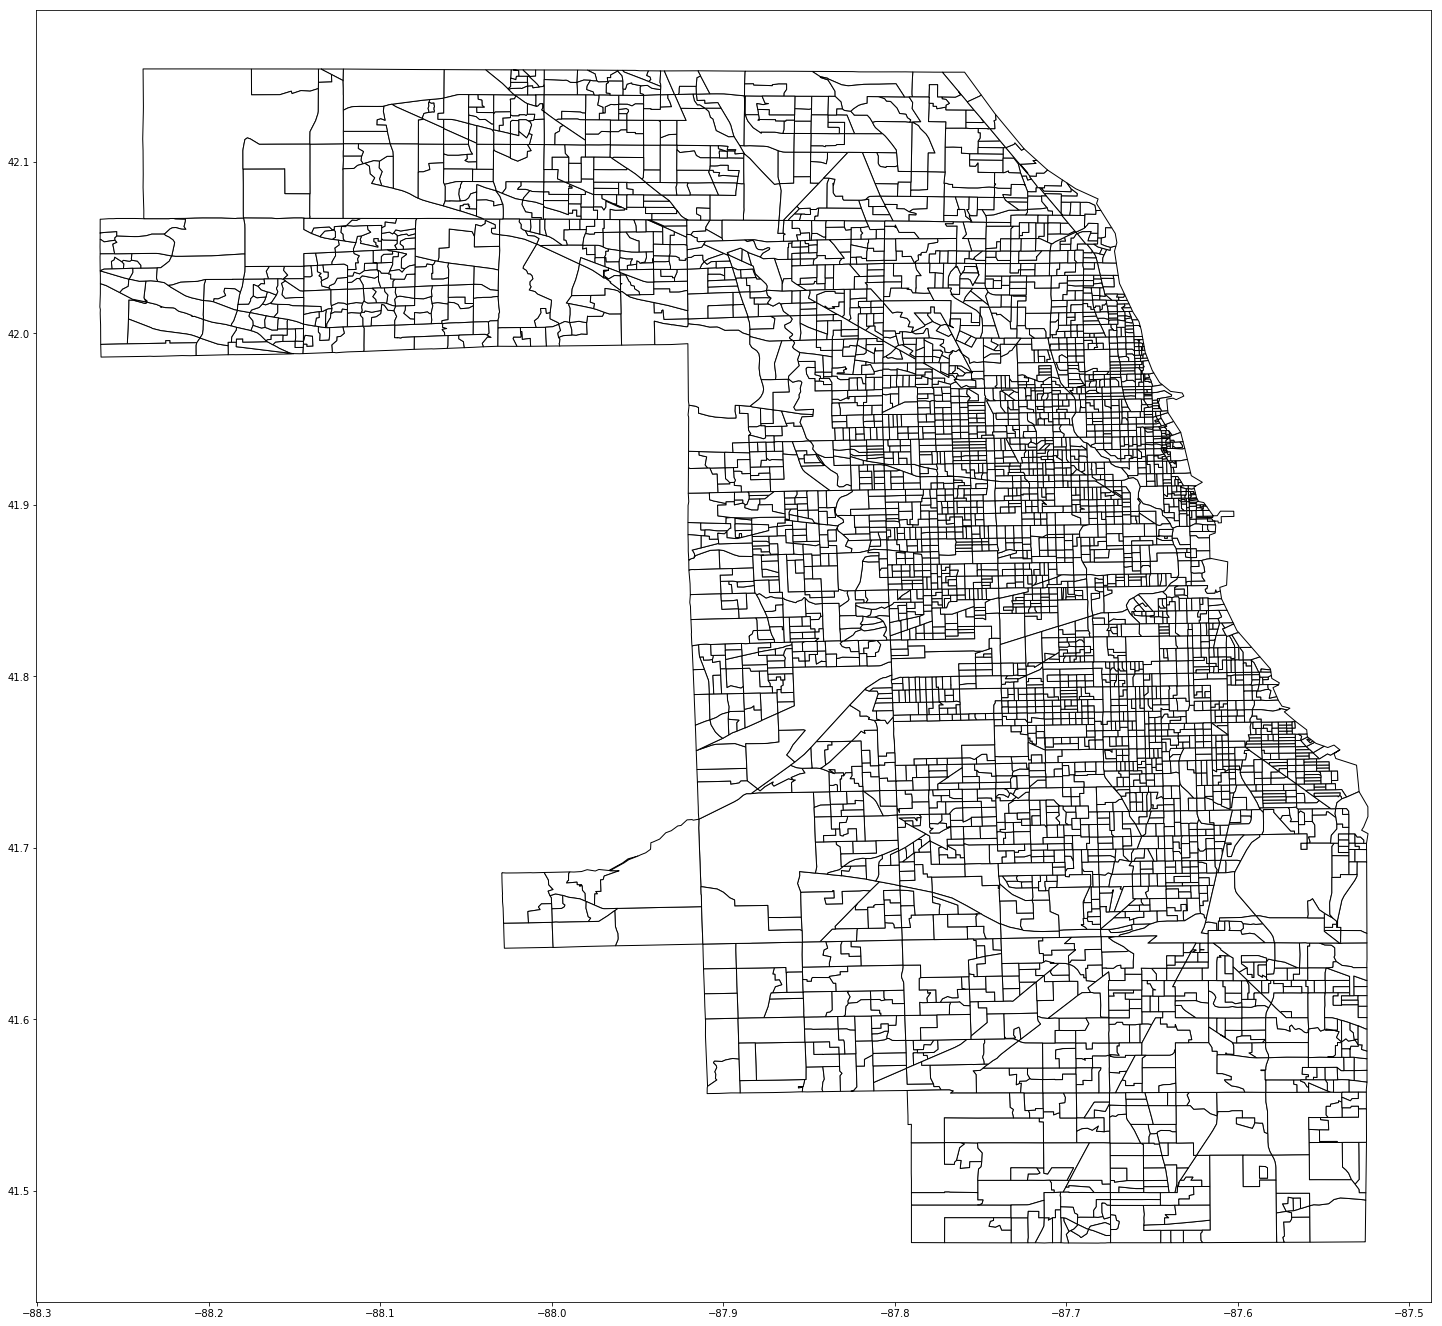

In [76]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'shapefiles', 'cb_2016_17_bg_500k.zip')
coord_system = {'init': 'epsg:4326'}
cook_census_blocks = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)
cook_census_blocks = cook_census_blocks[cook_census_blocks['COUNTYFP'] == '031']
cook_census_blocks['GEOID'] = cook_census_blocks['GEOID'].astype(str)
cook_census_blocks.plot(color='white', edgecolor='black', figsize=(25,25))

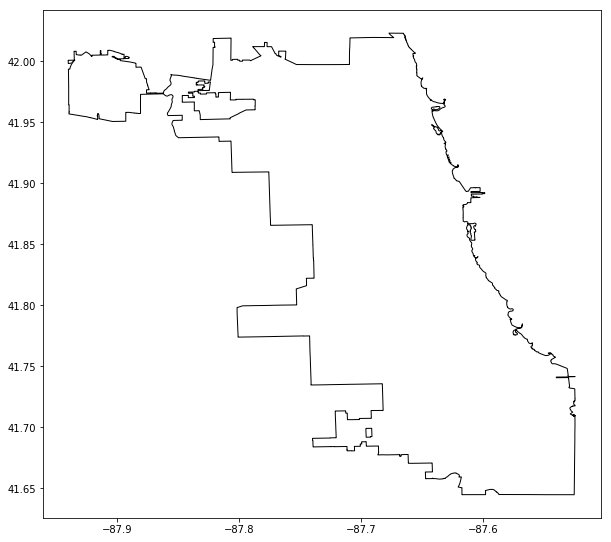

In [107]:
ZIP_SHP_PATH = os.path.join('zip://', 'data', 'shapefiles', 'Boundaries - City.zip')
coord_system = {'init': 'epsg:4326'}
chicago = gpd.read_file(ZIP_SHP_PATH).to_crs(coord_system)
chicago.drop(['shape_len', 'shape_area', 'objectid', 'name'], axis=1, inplace=True)
chicago.plot(color='white', edgecolor='black', figsize=(10,10))

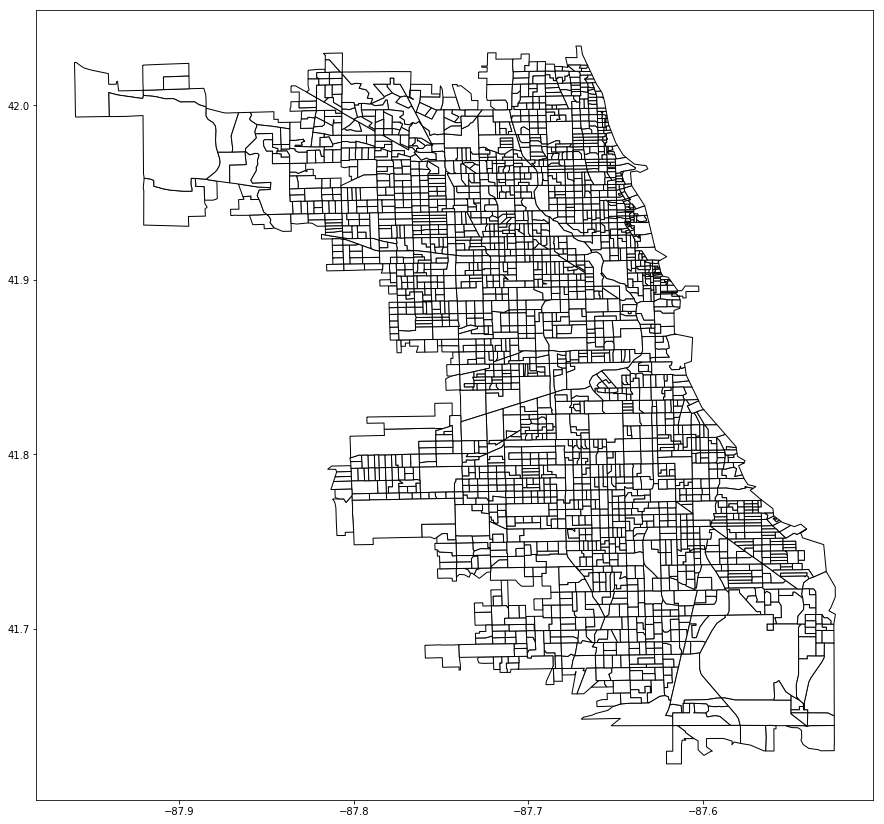

In [114]:
chicagoish = gpd.sjoin(left_df=cook_census_blocks, right_df=chicago, how='inner', op='intersects')
chicagoish.plot(color='white', edgecolor='black', figsize=(15,15))

In [115]:
chicagoish.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,index_right
0,17,031,010100,3,1500000US170310101003,170310101003,3,BG,133973,0,"POLYGON ((-87.669479 42.021143, -87.666584 42....",0
11,17,031,140800,5,1500000US170311408005,170311408005,5,BG,226961,5584,"POLYGON ((-87.708472 41.968452, -87.703605 41....",0
14,17,031,681000,3,1500000US170316810003,170316810003,3,BG,122400,0,"POLYGON ((-87.651977 41.776006, -87.648336 41....",0
16,17,031,252000,3,1500000US170312520003,170312520003,3,BG,180120,0,"POLYGON ((-87.774782 41.884132, -87.7698949999...",0
19,17,031,661100,2,1500000US170316611002,170316611002,2,BG,571658,0,"POLYGON ((-87.71253999999999 41.764242, -87.71...",0


In [33]:
ZIP_PATH = os.path.join('data', 'census', 'DEC_10_PL_P1.zip') 
with ZipFile(ZIP_PATH) as zip_file:
    with zip_file.open('DEC_10_PL_P1_with_ann.csv') as my_zipped_csv:
        cook_acs_df = pd.read_csv(my_zipped_csv, header=1, dtype={'Id2':str})

cook_acs_df.head()

,Id,Id2,Geography,Total:,Population of one race:,Population of one race: - White alone,Population of one race: - Black or African American alone,Population of one race: - American Indian and Alaska Native alone,Population of one race: - Asian alone,Population of one race: - Native Hawaiian and Other Pacific Islander alone,Population of one race: - Some Other Race alone,Two or More Races:,Two or More Races: - Population of two races:,Two or More Races: - Population of two races: - White; Black or African American,Two or More Races: - Population of two races: - White; American Indian and Alaska Native,Two or More Races: - Population of two races: - White; Asian,Two or More Races: - Population of two races: - White; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - White; Some Other Race,Two or More Races: - Population of two races: - Black or African American; American Indian and Alaska Native,Two or More Races: - Population of two races: - Black or African American; Asian,Two or More Races: - Population of two races: - Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Black or African American; Some Other Race,Two or More Races: - Population of two races: - American Indian and Alaska Native; Asian,Two or More Races: - Population of two races: - American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of two races: - Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Asian; Some Other Race,Two or More Races: - Population of two races: - Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races:,Two or More Races: - Population of three races: - White; Black or African American; American Indian and Alaska Native,Two or More Races: - Population of three races: - White; Black or African American; Asian,Two or More Races: - Population of three races: - White; Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Black or African American; Some Other Race,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - White; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Asian; Some Other Race,Two or More Races: - Population of three races: - White; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; Asian; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - American Indian and Alaska Native; Asian; Some Other Race,Two or More Races: - Population of th

In [81]:
print('cook_census_blocks.shape: {}'.format(cook_census_blocks.shape))
print('cook_acs_df.shape: {}'.format(cook_acs_df.shape))

cook_census_blocks.shape: (3992, 11)
cook_acs_df.shape: (3994, 75)


In [77]:
cook_census_blocks.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,17,031,010100,3,1500000US170310101003,170310101003,3,BG,133973,0,"POLYGON ((-87.669479 42.021143, -87.666584 42...."
2,17,031,811301,4,1500000US170318113014,170318113014,4,BG,1626156,0,"POLYGON ((-87.893986 41.91969, -87.890474 41.9..."
7,17,031,824123,1,1500000US170318241231,170318241231,1,BG,1086582,11903,"POLYGON ((-87.80476499999999 41.58991, -87.803..."
8,17,031,819900,2,1500000US170318199002,170318199002,2,BG,1069519,0,"POLYGON ((-87.913223 41.811342, -87.9116790000..."
11,17,031,140800,5,1500000US170311408005,170311408005,5,BG,226961,5584,"POLYGON ((-87.708472 41.968452, -87.703605 41...."


In [116]:
cook_gdf = pd.merge(left=cook_census_blocks, right=cook_acs_df, left_on='GEOID', right_on='Id2', how='inner')
cook_gdf.head(2)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Id,Id2,Geography,Total:,Population of one race:,Population of one race: - White alone,Population of one race: - Black or African American alone,Population of one race: - American Indian and Alaska Native alone,Population of one race: - Asian alone,Population of one race: - Native Hawaiian and Other Pacific Islander alone,Population of one race: - Some Other Race alone,Two or More Races:,Two or More Races: - Population of two races:,Two or More Races: - Population of two races: - White; Black or African American,Two or More Races: - Population of two races: - White; American Indian and Alaska Native,Two or More Races: - Population of two races: - White; Asian,Two or More Races: - Population of two races: - White; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - White; Some Other Race,Two or More Races: - Population of two races: - Black or African American; American Indian and Alaska Native,Two or More Races: - Population of two races: - Black or African American; Asian,Two or More Races: - Population of two races: - Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Black or African American; Some Other Race,Two or More Races: - Population of two races: - American Indian and Alaska Native; Asian,Two or More Races: - Population of two races: - American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of two races: - Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Asian; Some Other Race,Two or More Races: - Population of two races: - Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races:,Two or More Races: - Population of three races: - White; Black or African American; American Indian and Alaska Native,Two or More Races: - Population of three races: - White; Black or African American; Asian,Two or More Races: - Population of three races: - White; Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Black or African American; Some Other Race,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - White; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Asian; Some Other Race,Two or More Races: - Population of three races: - White; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; Asian; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - American India

In [117]:
chiish_gdf = pd.merge(left=chicagoish, right=cook_acs_df, left_on='GEOID', right_on='Id2', how='inner')
chiish_gdf.head(2)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,index_right,Id,Id2,Geography,Total:,Population of one race:,Population of one race: - White alone,Population of one race: - Black or African American alone,Population of one race: - American Indian and Alaska Native alone,Population of one race: - Asian alone,Population of one race: - Native Hawaiian and Other Pacific Islander alone,Population of one race: - Some Other Race alone,Two or More Races:,Two or More Races: - Population of two races:,Two or More Races: - Population of two races: - White; Black or African American,Two or More Races: - Population of two races: - White; American Indian and Alaska Native,Two or More Races: - Population of two races: - White; Asian,Two or More Races: - Population of two races: - White; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - White; Some Other Race,Two or More Races: - Population of two races: - Black or African American; American Indian and Alaska Native,Two or More Races: - Population of two races: - Black or African American; Asian,Two or More Races: - Population of two races: - Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Black or African American; Some Other Race,Two or More Races: - Population of two races: - American Indian and Alaska Native; Asian,Two or More Races: - Population of two races: - American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of two races: - Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Asian; Some Other Race,Two or More Races: - Population of two races: - Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races:,Two or More Races: - Population of three races: - White; Black or African American; American Indian and Alaska Native,Two or More Races: - Population of three races: - White; Black or African American; Asian,Two or More Races: - Population of three races: - White; Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Black or African American; Some Other Race,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - White; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Asian; Some Other Race,Two or More Races: - Population of three races: - White; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; Asian; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Am

In [118]:
chiish_gdf.shape

(2325, 87)

That outlier block in the center of the map is where the Cook County Department of Corrections facility is located, hence the higher population density.

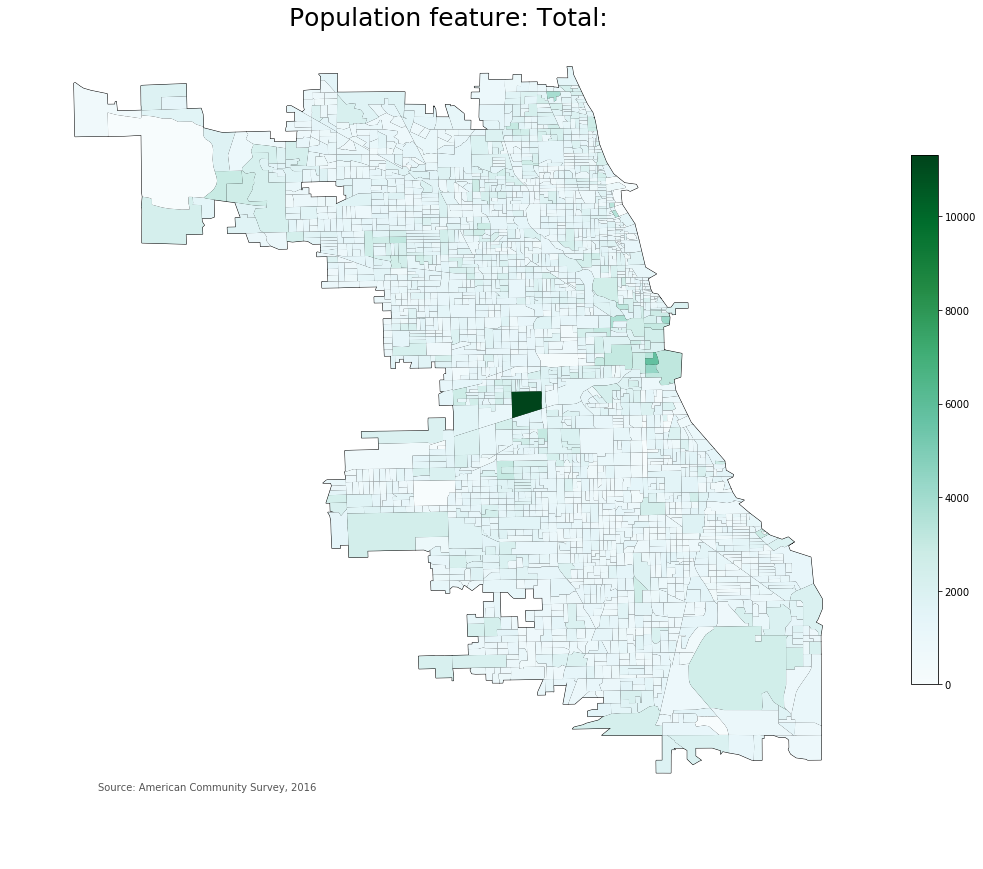

In [126]:
fig, ax = plt.subplots(figsize=(15,15))
my_cmap='BuGn'
col_ = 'Total:'
df = chiish_gdf
vmin = df[col_].min()
vmax = df[col_].max()

base = df.plot(color='white', edgecolor='black', ax=ax)
_ = df.plot(column=col_, cmap=my_cmap, ax=base)
_ = ax.axis('off')
_ = ax.set_title('Population feature: {}'.format(col_), 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
_ = ax.annotate('Source: American Community Survey, 2016',
                xy=(0.1, .1), xycoords='figure fraction',
                horizontalalignment='left', verticalalignment='top',
                fontsize=10, color='#555555')
sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink=0.5)
plt.tight_layout()

In [58]:
prefix_stripper = lambda x: x[5:]

In [60]:
cook_acs_df['tmp_id'] = cook_acs_df['Id2'].apply(prefix_stripper)

In [64]:
chicago_census_blocks['tmp_geoid'] = chicago_census_blocks['geoid10'].apply(prefix_stripper)

In [65]:
chicago_census_blocks.head()

,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry,tmp_geoid
0,2010,031,170316903002010,Block 2010,17,6903002010,690300,POLYGON ((-87.62906799941059 41.76908600007152...,6903002010
1,3007,031,170316809003007,Block 3007,17,6809003007,680900,"POLYGON ((-87.6341179992764 41.77446599958471,...",6809003007
2,3013,031,170316809003013,Block 3013,17,6809003013,680900,POLYGON ((-87.63485400018324 41.77263300022619...,6809003013
3,4019,031,170312909004019,Block 4019,17,2909004019,290900,POLYGON ((-87.73841099998789 41.85913100037079...,2909004019
4,4016,031,170312925004016,Block 4016,17,2925004016,292500,POLYGON ((-87.73217300001724 41.85476400046529...,2925004016


In [68]:
tmp = pd.merge(left=chicago_census_blocks, right=cook_acs_df, left_on='tmp_geoid', right_on='tmp_id', how='inner')
tmp.head()

,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry,tmp_geoid,Id,Id2,Geography,Total:,Population of one race:,Population of one race: - White alone,Population of one race: - Black or African American alone,Population of one race: - American Indian and Alaska Native alone,Population of one race: - Asian alone,Population of one race: - Native Hawaiian and Other Pacific Islander alone,Population of one race: - Some Other Race alone,Two or More Races:,Two or More Races: - Population of two races:,Two or More Races: - Population of two races: - White; Black or African American,Two or More Races: - Population of two races: - White; American Indian and Alaska Native,Two or More Races: - Population of two races: - White; Asian,Two or More Races: - Population of two races: - White; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - White; Some Other Race,Two or More Races: - Population of two races: - Black or African American; American Indian and Alaska Native,Two or More Races: - Population of two races: - Black or African American; Asian,Two or More Races: - Population of two races: - Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Black or African American; Some Other Race,Two or More Races: - Population of two races: - American Indian and Alaska Native; Asian,Two or More Races: - Population of two races: - American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of two races: - Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Asian; Some Other Race,Two or More Races: - Population of two races: - Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races:,Two or More Races: - Population of three races: - White; Black or African American; American Indian and Alaska Native,Two or More Races: - Population of three races: - White; Black or African American; Asian,Two or More Races: - Population of three races: - White; Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Black or African American; Some Other Race,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - White; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Asian; Some Other Race,Two or More Races: - Population of three races: - White; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; Asian; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - American 

In [69]:
tmp = pd.merge(left=chicago_census_blocks, right=cook_acs_df, left_on='geoid10', right_on='Id2', how='inner')
tmp.head()

,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry,tmp_geoid,Id,Id2,Geography,Total:,Population of one race:,Population of one race: - White alone,Population of one race: - Black or African American alone,Population of one race: - American Indian and Alaska Native alone,Population of one race: - Asian alone,Population of one race: - Native Hawaiian and Other Pacific Islander alone,Population of one race: - Some Other Race alone,Two or More Races:,Two or More Races: - Population of two races:,Two or More Races: - Population of two races: - White; Black or African American,Two or More Races: - Population of two races: - White; American Indian and Alaska Native,Two or More Races: - Population of two races: - White; Asian,Two or More Races: - Population of two races: - White; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - White; Some Other Race,Two or More Races: - Population of two races: - Black or African American; American Indian and Alaska Native,Two or More Races: - Population of two races: - Black or African American; Asian,Two or More Races: - Population of two races: - Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Black or African American; Some Other Race,Two or More Races: - Population of two races: - American Indian and Alaska Native; Asian,Two or More Races: - Population of two races: - American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of two races: - Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Asian; Some Other Race,Two or More Races: - Population of two races: - Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races:,Two or More Races: - Population of three races: - White; Black or African American; American Indian and Alaska Native,Two or More Races: - Population of three races: - White; Black or African American; Asian,Two or More Races: - Population of three races: - White; Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Black or African American; Some Other Race,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - White; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Asian; Some Other Race,Two or More Races: - Population of three races: - White; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; Asian; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - American 

In [62]:
len("0101001")

7

In [56]:
cook_acs_df.loc[550, 'Id2']

'170311505012'

In [55]:
cook_acs_df.loc[550, 'Id2'][5:]

'1505012'

In [27]:
cook_acs_df['Id2'] = cook_acs_df['Id2'].astype(str)

In [15]:
chicago_census_blocks.head()

,blockce10,countyfp10,geoid10,name10,statefp10,tract_bloc,tractce10,geometry
0,2010,031,170316903002010,Block 2010,17,6903002010,690300,POLYGON ((-87.62906799941059 41.76908600007152...
1,3007,031,170316809003007,Block 3007,17,6809003007,680900,"POLYGON ((-87.6341179992764 41.77446599958471,..."
2,3013,031,170316809003013,Block 3013,17,6809003013,680900,POLYGON ((-87.63485400018324 41.77263300022619...
3,4019,031,170312909004019,Block 4019,17,2909004019,290900,POLYGON ((-87.73841099998789 41.85913100037079...
4,4016,031,170312925004016,Block 4016,17,2925004016,292500,POLYGON ((-87.73217300001724 41.85476400046529...


In [44]:
chicago_census_blocks['name10'].unique()

array(['Block 2010', 'Block 3007', 'Block 3013', 'Block 4019',
       'Block 4016', 'Block 4000', 'Block 2003', 'Block 2002',
       'Block 3019', 'Block 3005', 'Block 3021', 'Block 1034',
       'Block 2042', 'Block 1020', 'Block 1021', 'Block 1049',
       'Block 4007', 'Block 4011', 'Block 3008', 'Block 1022',
       'Block 1012', 'Block 4013', 'Block 3010', 'Block 1001',
       'Block 1032', 'Block 1017', 'Block 2031', 'Block 2019',
       'Block 6010', 'Block 1002', 'Block 3025', 'Block 2044',
       'Block 3014', 'Block 1004', 'Block 1011', 'Block 2025',
       'Block 2011', 'Block 1023', 'Block 1008', 'Block 1006',
       'Block 1027', 'Block 1018', 'Block 1000', 'Block 2009',
       'Block 3004', 'Block 5022', 'Block 3017', 'Block 2013',
       'Block 2008', 'Block 4001', 'Block 2023', 'Block 2028',
       'Block 4015', 'Block 4002', 'Block 4027', 'Block 4040',
       'Block 2012', 'Block 2001', 'Block 2059', 'Block 2049',
       'Block 5004', 'Block 1015', 'Block 4096', 'Block

In [42]:
type(chicago_census_blocks)

geopandas.geodataframe.GeoDataFrame

In [41]:
cook_acs_df['Geography'].nunique()

3994

In [43]:
tmp_within = gpd.sjoin(chicago_census_blocks, cook_acs_df, op="within")
tmp_within.head()

AttributeError: 'DataFrame' object has no attribute 'crs'

In [16]:
len("170316903002010")

15

In [17]:
len("170310102012")

12

In [21]:
len("6903002010")

10

In [23]:
"6903002010" in "170316903002010"

True

In [32]:
cook_acs_df[cook_acs_df['Id2'].str.contains("6903002010")]

,Id,Id2,Geography,Total:,Population of one race:,Population of one race: - White alone,Population of one race: - Black or African American alone,Population of one race: - American Indian and Alaska Native alone,Population of one race: - Asian alone,Population of one race: - Native Hawaiian and Other Pacific Islander alone,Population of one race: - Some Other Race alone,Two or More Races:,Two or More Races: - Population of two races:,Two or More Races: - Population of two races: - White; Black or African American,Two or More Races: - Population of two races: - White; American Indian and Alaska Native,Two or More Races: - Population of two races: - White; Asian,Two or More Races: - Population of two races: - White; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - White; Some Other Race,Two or More Races: - Population of two races: - Black or African American; American Indian and Alaska Native,Two or More Races: - Population of two races: - Black or African American; Asian,Two or More Races: - Population of two races: - Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Black or African American; Some Other Race,Two or More Races: - Population of two races: - American Indian and Alaska Native; Asian,Two or More Races: - Population of two races: - American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of two races: - Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of two races: - Asian; Some Other Race,Two or More Races: - Population of two races: - Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races:,Two or More Races: - Population of three races: - White; Black or African American; American Indian and Alaska Native,Two or More Races: - Population of three races: - White; Black or African American; Asian,Two or More Races: - Population of three races: - White; Black or African American; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Black or African American; Some Other Race,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - White; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - White; Asian; Some Other Race,Two or More Races: - Population of three races: - White; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Asian,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; American Indian and Alaska Native; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - Black or African American; Asian; Some Other Race,Two or More Races: - Population of three races: - Black or African American; Native Hawaiian and Other Pacific Islander; Some Other Race,Two or More Races: - Population of three races: - American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander,Two or More Races: - Population of three races: - American Indian and Alaska Native; Asian; Some Other Race,Two or More Races: - Population of th

In [29]:
df[df['A'].str.contains("hello")]

NameError: name 'df' is not defined